# Exploring the NASA Exoplanet Archive planetary properties data

In [1]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
table_1 = Table.read('../data/Exoplanet_Finder/PSCompPars_2021.05.05_09.35.40.votable',format='votable')

In [3]:
df_orig = table_1.to_pandas()

In [4]:
df_orig.shape

(4383, 245)

In [5]:
pd.options.display.max_rows=999

In [6]:
df_orig.iloc[0]

pl_name                                                      11 Com b
hostname                                                       11 Com
pl_letter                                                           b
hd_name                                                     HD 107383
hip_name                                                    HIP 60202
tic_id                                                   TIC 72437047
gaia_id                                  Gaia DR2 3946945413106333696
sy_snum                                                             2
sy_pnum                                                             1
sy_mnum                                                             0
cb_flag                                                             0
discoverymethod                                       Radial Velocity
disc_year                                                        2007
disc_refname        <a refstr=LIU_ET_AL__2008 href=https://ui.adsa...
disc_pubdate        

In [7]:
list(df_orig.columns)

['pl_name',
 'hostname',
 'pl_letter',
 'hd_name',
 'hip_name',
 'tic_id',
 'gaia_id',
 'sy_snum',
 'sy_pnum',
 'sy_mnum',
 'cb_flag',
 'discoverymethod',
 'disc_year',
 'disc_refname',
 'disc_pubdate',
 'disc_locale',
 'disc_facility',
 'disc_telescope',
 'disc_instrument',
 'pl_controv_flag',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_dens',
 'pl_denserr1',
 'pl_denserr2',
 'pl_denslim',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'pl_orbincl',
 'pl_orbinclerr1',
 'pl_orbinc

(-5.0, 4.0)

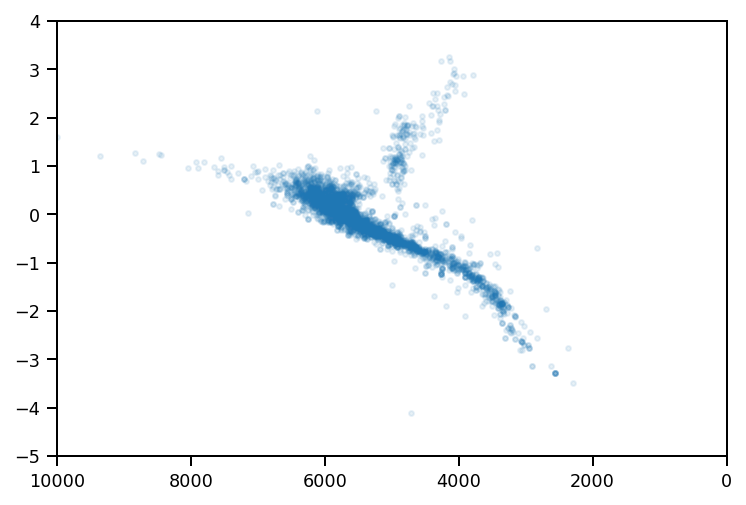

In [8]:
plt.plot(df_orig.st_teff,df_orig.st_lum,'.',alpha=0.1) #hr diagram
plt.xlim(10000,0)
plt.ylim(-5,4)

(-5.0, 250.0)

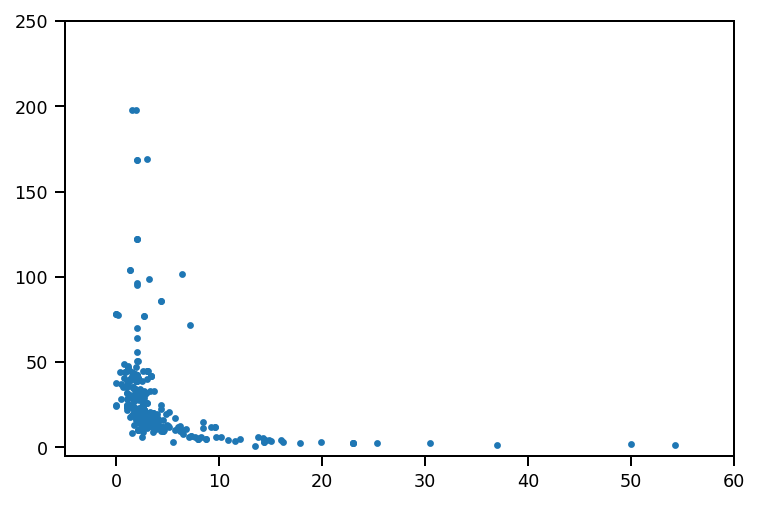

In [17]:
plt.plot(df_orig.st_vsin,df_orig.st_rotp,'.')
plt.xlim(-5,60)
plt.ylim(-5,250) #inversely relates

In [15]:
df_orig.hostname.value_counts() #duplicates? merged values,see how many planets in system with hostname

KOI-351              8
TRAPPIST-1           7
HD 34445             6
Kepler-20            6
Kepler-11            6
                    ..
NGC 2682 Sand 364    1
Kepler-1392          1
Kepler-1253          1
Kepler-1680          1
Kepler-1430          1
Name: hostname, Length: 3254, dtype: int64

In [6]:
df=df_orig[['hostname','st_teff','st_rad','st_mass','st_logg','sy_refname','ra','dec']] #need rv, vsini
df

,hostname,st_teff,st_rad,st_mass,st_logg,sy_refname,ra,dec
0,11 Com,NaN,NaN,2.60,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,185.178772,17.793251
1,11 Com,4742.0,19.00,2.70,2.31,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,185.178772,17.793251
2,11 UMi,4340.0,24.08,1.80,1.60,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,229.274597,71.823944
3,11 UMi,NaN,NaN,1.70,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,229.274597,71.823944
4,11 UMi,4213.0,29.79,2.78,1.93,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,229.274597,71.823944
...,...,...,...,...,...,...,...,...
29382,ups And,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,24.198353,41.403816
29383,ups And,NaN,1.56,1.30,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,24.198353,41.403816
29384,ups And,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,24.198353,41.403816
29385,xi Aql,4780.0,12.00,2.20,2.66,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,298.562439,8.461105


In [8]:
hat_p_32_coord = '02 04 10.2775457769 +46 41 16.210382751'

In [14]:
coordinates = SkyCoord(hat_p_32_coord,unit=(u.hourangle,u.deg))

In [15]:
catalog = SkyCoord(ra=df.ra.values*u.degree, dec=df.dec.values*u.degree)
idx, d2d, d3d = coordinates.match_to_catalog_sky(catalog)

In [16]:
idx #returns index with number within list for desired object

array(766, dtype=int64)

In [17]:
df.iloc[766]

hostname                                               HAT-P-32
st_teff                                                  6269.0
st_rad                                                     1.22
st_mass                                                     NaN
st_logg                                                     NaN
sy_refname    <a refstr=STASSUN_ET_AL__2019 href=https://ui....
ra                                                    31.042761
dec                                                   46.687851
Name: 766, dtype: object

In [42]:
coordinates=SkyCoord.from_name('HAT-P-32b')

In [43]:
sep = coordinates.separation(catalog) #list of how far apart all objects are

In [44]:
matches = sep < 10*u.arcsec

In [45]:
matches.sum() #boolean

9

In [46]:
df[matches]

,hostname,st_teff,st_rad,st_mass,st_logg,sy_refname,ra,dec
758,HAT-P-32,NaN,NaN,1.16,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
759,HAT-P-32,6001.0,1.37,1.13,4.22,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
760,HAT-P-32,NaN,1.22,1.16,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
761,HAT-P-32,3187.0,NaN,NaN,4.94,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
762,HAT-P-32,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
763,HAT-P-32,6207.0,1.22,1.16,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
764,HAT-P-32,6207.0,1.19,1.09,4.33,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
765,HAT-P-32,6207.0,1.22,1.16,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851
766,HAT-P-32,6269.0,1.22,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,31.042761,46.687851


In [20]:
idx, d2d, d3d = coordinates.match_to_catalog_sky(catalog)

In [27]:
coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    (24.19934235, 41.40545674)>

In [26]:
catalog.search_around_sky([coordinates],seplimit=5*u.arcsec)

AttributeError: 'list' object has no attribute 'isscalar'